In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
import snowflake.connector
import pandas as pd

# Function to load Google Gemini model and provide query as response

# Function to retrieve query from Snowflake database and return as a Pandas DataFrame
def read_snowflake_query(sql):
    # Establish connection to Snowflake
    conn = snowflake.connector.connect(
        user='your_username',
        password='your_password',
        account='your_accountname',
        warehouse='your_warehouse',
        database='your_database',
        schema='you_schema'
    )
    # Execute the query and fetch all results
    df = pd.read_sql(sql, conn)
    
    # Close the connection
    conn.close()

    return df

# Example usage:
sql = "SELECT * FROM your_table;"
df = read_snowflake_query(sql)

In [19]:
df = pd.read_csv('path_to_dataset')

In [20]:
df.head()

,StandardDateofBooking,StandardDateofJourney,Month_of_Journey,Airline_Company,Flight_Number,Flight_Class,Departure_Time,Departure_City,Arrival_Time,Arrival_City,Duration_in_mins,Total Stops,Price
0,2023-01-15,2023-06-03,6,Air India,AI-624,ECONOMY,19:00,Delhi,07:25,Hyderabad,745.0,1-stop,8895.0
1,2023-01-15,2023-06-03,6,Air India,AI-678,ECONOMY,09:00,Delhi,21:40,Hyderabad,760.0,NaN,8895.0
2,2023-01-15,2023-03-06,3,Air India,AI-441,ECONOMY,17:50,Delhi,07:25,Hyderabad,815.0,NaN,8895.0
3,2023-01-15,2023-06-03,6,Air India,AI-665,ECONOMY,08:00,Delhi,21:40,Hyderabad,820.0,1-stop,8895.0
4,2023-01-15,2023-06-03,6,Air India,AI-814,ECONOMY,22:30,Delhi,12:25,Hyderabad,835.0,1-stop,8895.0


In [21]:
df.isnull().sum()

StandardDateofBooking       0
StandardDateofJourney       0
Month_of_Journey            0
Airline_Company          9171
Flight_Number            9171
Flight_Class             9171
Departure_Time           9165
Departure_City           9165
Arrival_Time             9159
Arrival_City             9159
Duration_in_mins         9150
Total Stops              9179
Price                    9172
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458869 entries, 0 to 458868
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   StandardDateofBooking  458869 non-null  object 
 1   StandardDateofJourney  458869 non-null  object 
 2   Month_of_Journey       458869 non-null  int64  
 3   Airline_Company        449698 non-null  object 
 4   Flight_Number          449698 non-null  object 
 5   Flight_Class           449698 non-null  object 
 6   Departure_Time         449704 non-null  object 
 7   Departure_City         449704 non-null  object 
 8   Arrival_Time           449710 non-null  object 
 9   Arrival_City           449710 non-null  object 
 10  Duration_in_mins       449719 non-null  float64
 11  Total Stops            449690 non-null  object 
 12  Price                  449697 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 45.5+ MB


In [23]:
df1 = df.dropna()

In [24]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['Airline_Company',
 'Flight_Number',
 'Flight_Class',
 'Departure_Time',
 'Departure_City',
 'Arrival_Time',
 'Arrival_City',
 'Duration_in_mins',
 'Total Stops',
 'Price']

In [25]:
len(df[cols].dropna()) / len(df)

0.88582580213525

In [26]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((458869, 13), (406478, 10))

<Axes: >

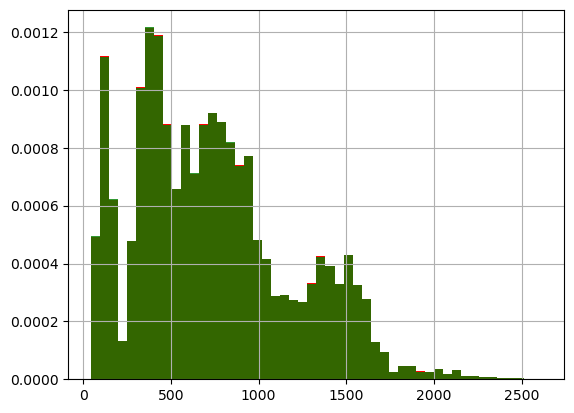

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['Duration_in_mins'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['Duration_in_mins'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: >

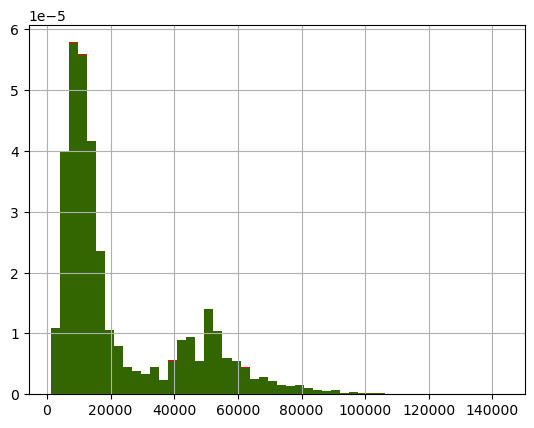

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['Price'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['Price'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

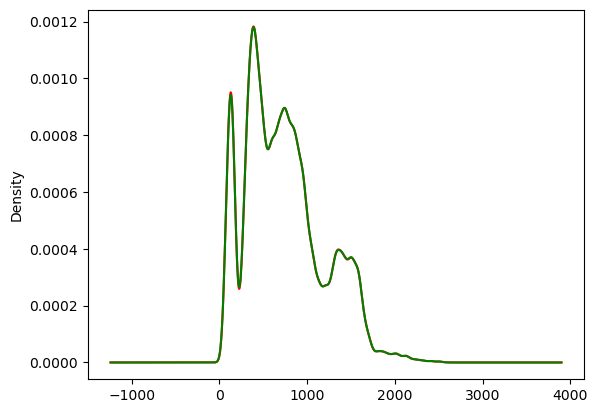

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['Duration_in_mins'].plot.density(color='red')

# data after cca
new_df['Duration_in_mins'].plot.density(color='green')

<Axes: ylabel='Density'>

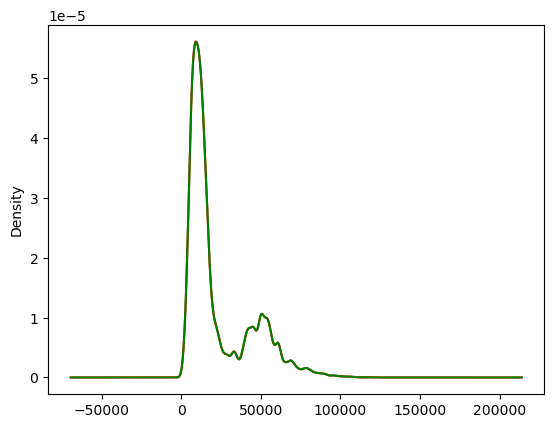

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['Price'].plot.density(color='red')

# data after cca
new_df['Price'].plot.density(color='green')

In [38]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['Airline_Company'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['Airline_Company'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Airline_Company,,
Vistara,0.501581,0.512151
Air India,0.259835,0.264895
Indigo,0.142424,0.145186
AirAsia,0.034219,0.034907
GO FIRST,0.023408,0.023891
SpiceJet,0.012738,0.013031
AkasaAir,0.004814,0.004945
AllianceAir,0.000863,0.000851
StarAir,0.000133,0.000143


In [39]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['Flight_Class'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['Flight_Class'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Flight_Class,,
ECONOMY,0.546341,0.557363
BUSINESS,0.275020,0.280583
PREMIUMECONOMY,0.158331,0.161714
FIRST,0.000323,0.000340


In [41]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['Departure_City'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['Departure_City'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Departure_City,,
Delhi,0.180097,0.183592
Mumbai,0.174841,0.178492
Bangalore,0.158991,0.162314
Hyderabad,0.122743,0.125242
Chennai,0.122737,0.125244
Kolkata,0.120562,0.122993
Ahmedabad,0.100057,0.102124


In [42]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['Arrival_City'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['Departure_City'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Arrival_City,,
Mumbai,0.179973,0.183604
Delhi,0.168421,0.171876
Bangalore,0.156775,0.159918
Hyderabad,0.135764,0.138497
Chennai,0.124840,0.127421
Kolkata,0.118029,0.120398
Ahmedabad,0.096239,0.098286


In [44]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['Total Stops'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['Total Stops'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Total Stops,,
1-stop,0.795399,0.811872
non-stop,0.112215,0.114400
2+-stop,0.066623,0.067854
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR,0.003164,0.003260
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore,0.000684,0.000672
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Delhi,0.000597,0.000608
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Pune,0.000595,0.000613
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati,0.000181,0.000187
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR,0.000181,0.000175


In [45]:
X = df.drop(columns=['Price'])
y = df['Price']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [47]:
X_train.shape, X_test.shape

((367095, 12), (91774, 12))

In [48]:
mean_duration = X_train['Duration_in_mins'].mean()
median_duration = X_train['Duration_in_mins'].median()

In [49]:
X_train['Duration_in_mins_mean'] = X_train['Duration_in_mins'].fillna(mean_duration)
X_train['Duration_in_mins_median'] = X_train['Duration_in_mins'].fillna(median_duration)

In [50]:
print('Original Duration_in_mins variable variance: ', X_train['Duration_in_mins'].var())
print('Age Variance after median imputation: ', X_train['Duration_in_mins_mean'].var())
print('Age Variance after mean imputation: ', X_train['Duration_in_mins_median'].var())

Original Duration_in_mins variable variance:  198940.41463167698
Age Variance after median imputation:  195003.27016104865
Age Variance after mean imputation:  195075.52479686792


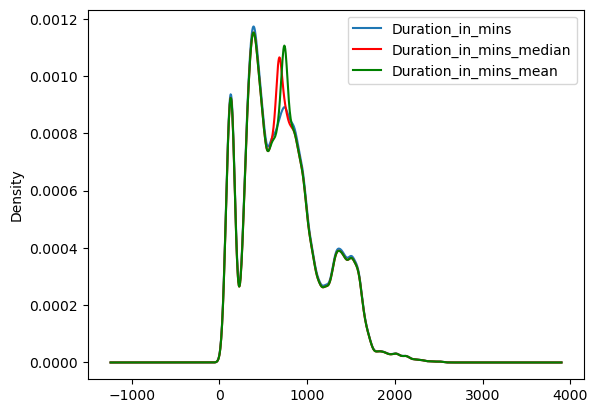

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Duration_in_mins'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Duration_in_mins_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Duration_in_mins_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<Axes: >

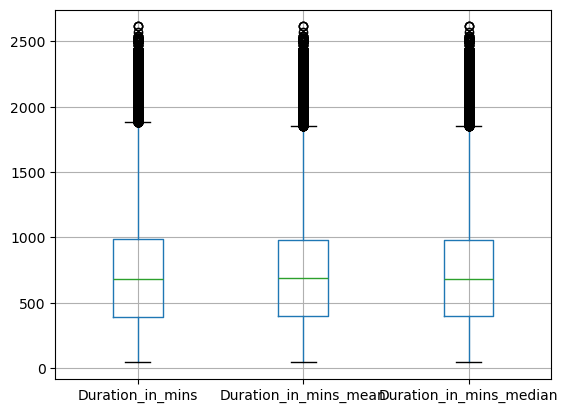

In [52]:
X_train[['Duration_in_mins', 'Duration_in_mins_mean', 'Duration_in_mins_median']].boxplot()

# <-------------------------------------------------------------------------------------------------------------------------------------------------------->
## Filling missing values in target column

In [57]:
Price_mean = y_train.mean()
Price_median = y_train.median()

In [59]:
y_train['Price_mean'] = y_train.fillna(mean_duration)
y_train['Price_median'] = y_train.fillna(median_duration)

In [56]:
print('Original Price variable variance: ', y_train.var())
print('Price Variance after median imputation: ', y_train.var())
print('Price Variance after mean imputation: ', y_train.var())

Original Price variable variance:  412278642.57025605
Price Variance after median imputation:  412278642.57025605
Price Variance after mean imputation:  412278642.57025605


In [63]:
y_train

,Original_Price_Column,Price_Mean,Price_Median
0,8895.0,8895.0,8895.0
1,8895.0,8895.0,8895.0
2,8895.0,8895.0,8895.0
3,8895.0,8895.0,8895.0
4,8895.0,8895.0,8895.0
...,...,...,...
458864,7005.0,7005.0,7005.0
458865,5107.0,5107.0,5107.0
458866,6862.0,6862.0,6862.0
458867,81521.0,81521.0,81521.0


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('part-merged_1.csv')

# Split the data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state = 2)

price_mean = train_df['Price'].astype(float).mean()
price_median = train_df['Price'].astype(float).median()

train_df['Original_Price_Column'] = train_df['Price']
train_df['Price_Mean'] = train_df['Price'].astype(float).fillna(price_mean)
train_df['Price_Median'] = train_df['Price'].astype(float).fillna(price_median)

test_df['Original_Price_Column'] = test_df['Price']
test_df['Price_Mean'] = test_df['Price'].astype(float).fillna(price_mean)
test_df['Price_Median'] = test_df['Price'].astype(float).fillna(price_median)

combined_df = pd.concat([train_df, test_df])

output_df = combined_df[['Original_Price_Column', 'Price_Mean', 'Price_Median']]

output_df.to_csv('price_columns_transformed.csv', index=False)

File saved as 'price_columns_transformed.csv'


# <-------------------------------------------------------------------------------------------------------------------------------------------------------->

<Axes: xlabel='Airline_Company'>

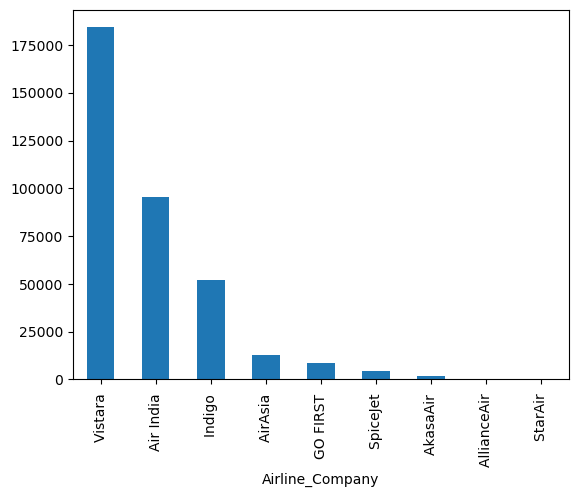

In [70]:
X_train['Airline_Company'].value_counts().plot(kind='bar')

In [92]:
X_train['Airline_Company'].value_counts()

Airline_Company
Vistara         184145
Air India        95265
Indigo           52279
AirAsia          12654
GO FIRST          8599
SpiceJet          4674
AkasaAir          1776
AllianceAir        323
StarAir             48
Name: count, dtype: int64

<Axes: xlabel='Flight_Class'>

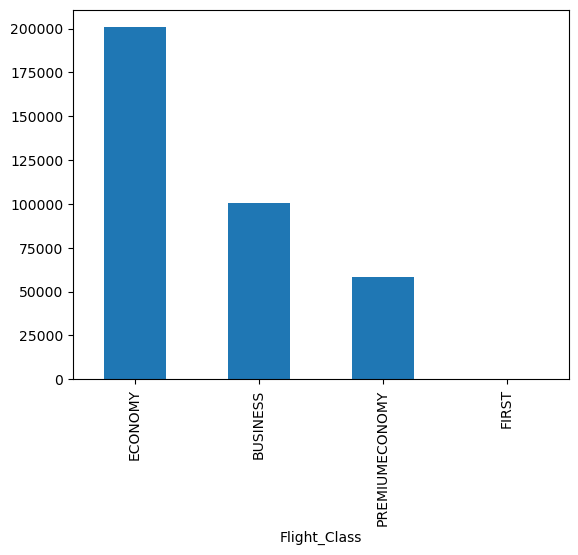

In [72]:
X_train['Flight_Class'].value_counts().plot(kind='bar')

<Axes: xlabel='Departure_City'>

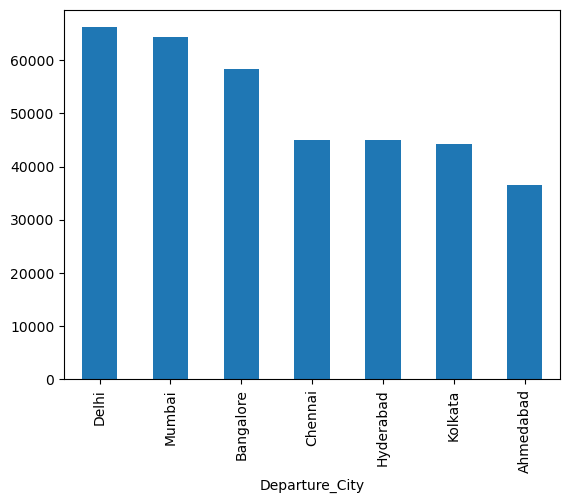

In [75]:
X_train['Departure_City'].value_counts().plot(kind='bar')

<Axes: xlabel='Arrival_City'>

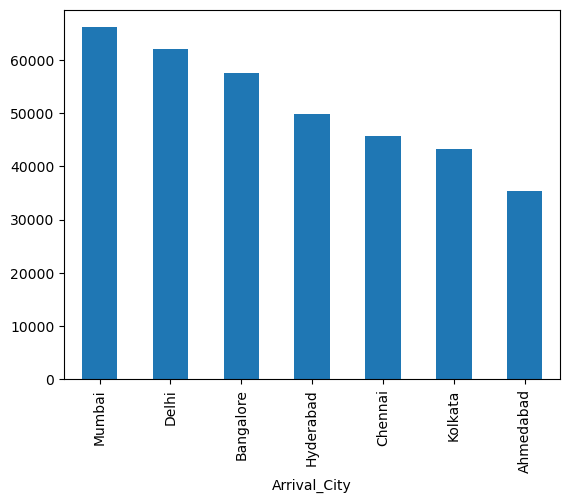

In [76]:
X_train['Arrival_City'].value_counts().plot(kind='bar')

<Axes: xlabel='Total Stops'>

/home/growlt257/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/home/growlt257/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


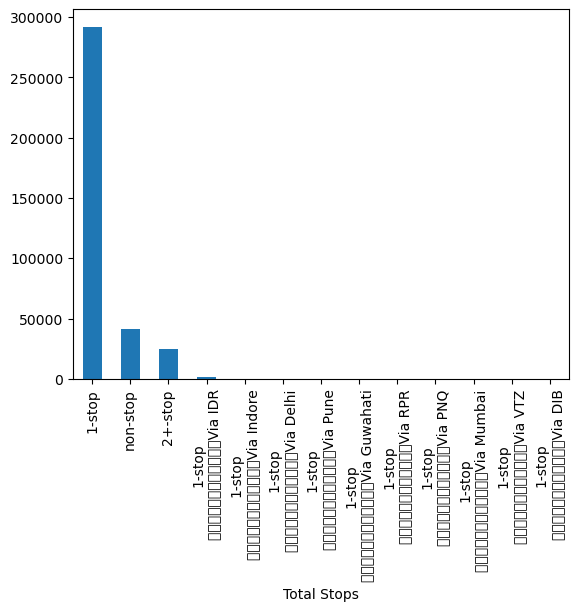

In [77]:
X_train['Total Stops'].value_counts().plot(kind='bar')

In [78]:
X_train['Total Stops'].value_counts()

Total Stops
1-stop                                          291783
non-stop                                         41357
2+-stop                                          24515
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR           1128
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore         254
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Delhi          223
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Pune           221
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati        67
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR             66
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PNQ             49
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Mumbai          36
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ             34
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia DIB              9
Name: count, dtype: int64

In [79]:
df.head()

,StandardDateofBooking,StandardDateofJourney,Month_of_Journey,Airline_Company,Flight_Number,Flight_Class,Departure_Time,Departure_City,Arrival_Time,Arrival_City,Duration_in_mins,Total Stops,Price
0,2023-01-15,2023-06-03,6,Air India,AI-624,ECONOMY,19:00,Delhi,07:25,Hyderabad,745.0,1-stop,8895.0
1,2023-01-15,2023-06-03,6,Air India,AI-678,ECONOMY,09:00,Delhi,21:40,Hyderabad,760.0,NaN,8895.0
2,2023-01-15,2023-03-06,3,Air India,AI-441,ECONOMY,17:50,Delhi,07:25,Hyderabad,815.0,NaN,8895.0
3,2023-01-15,2023-06-03,6,Air India,AI-665,ECONOMY,08:00,Delhi,21:40,Hyderabad,820.0,1-stop,8895.0
4,2023-01-15,2023-06-03,6,Air India,AI-814,ECONOMY,22:30,Delhi,12:25,Hyderabad,835.0,1-stop,8895.0


In [82]:
df.shape

(458869, 13)

In [84]:
df.dtypes

StandardDateofBooking     object
StandardDateofJourney     object
Month_of_Journey           int64
Airline_Company           object
Flight_Number             object
Flight_Class              object
Departure_Time            object
Departure_City            object
Arrival_Time              object
Arrival_City              object
Duration_in_mins         float64
Total Stops               object
Price                    float64
dtype: object

<Axes: xlabel='Duration_in_mins', ylabel='Price'>

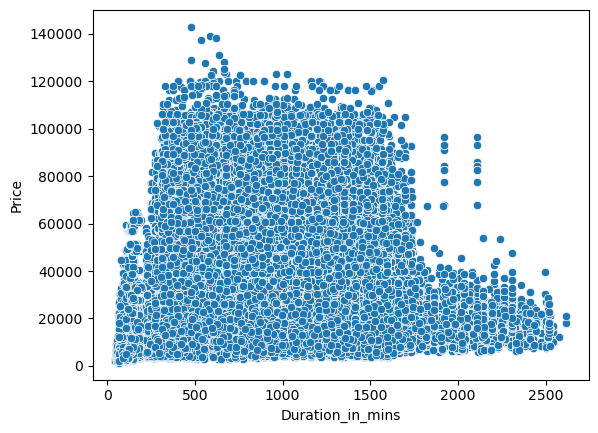

In [87]:
sns.scatterplot(x="Duration_in_mins" , y="Price" , data=df)

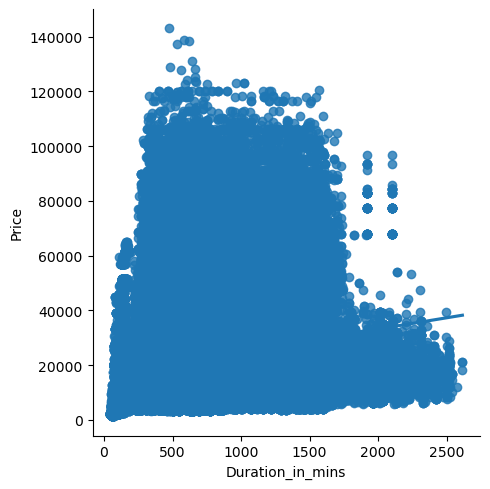

In [88]:
sns.lmplot(x="Duration_in_mins" , y="Price" , data=df)

In [96]:
X_train['Flight_Number'].value_counts()

Flight_Number
UK-936     4403
UK-918     4253
UK-706     4178
UK-832     3603
UK-926     3597
           ... 
QP-1301       1
6E- 251       1
6E-2417       1
SG- 253       1
6E-6835       1
Name: count, Length: 1401, dtype: int64

<Axes: xlabel='Flight_Class'>

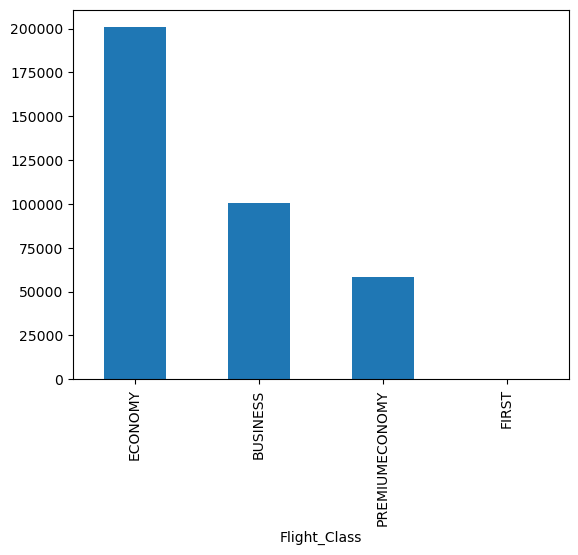

In [98]:
X_train['Flight_Class'].value_counts().plot(kind='bar')

In [99]:
X_train['Flight_Class'].value_counts()

Flight_Class
ECONOMY           200686
BUSINESS          100804
PREMIUMECONOMY     58155
FIRST                118
Name: count, dtype: int64